# Data: Exploratory Analysis
Some basic information about the datasets.   



The data was collected using PyGitHub Python library and scraping which is allowed for research purposes ([GitHub Terms of Service](https://help.github.com/en/articles/github-terms-of-service#5-scraping)). 



### Preparation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from time import sleep
from tqdm import tqdm_notebook as tqdm
from wordcloud import WordCloud, STOPWORDS

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PATH_TO_DATA = '/content/drive/My Drive/GitHub Research/'

## Information about repositories

### Repositories
Dataset with information **about repositories**.  
Date: 28/04/2019  
1. **full_name** - full name of the repository *(owner/title)*  
2. **name** - title of repository  
3. **description**  - description 
4. **owner** - owner  
5. **language** - programming languages used
6. **forks_count** - number of forks
7. **stargazers_count** - number of stargazers  
8. **watchers_count** - number of watchers (x)
9. **open_issues_count** - number of open issues  
10. **topics** - topics *(i.e. tags)*  
11. **contributors** - list of contributors 


Note: GitHub API returned same numbers for `stargazers_count` and	`watchers_count`. However, it stands for the number of stars.

In [8]:
repos_df = pd.read_csv(PATH_TO_DATA + '/data/repos_df.csv', index_col=0)
repos_df.head()

,full_name,name,description,owner,language,forks_count,stargazers_count,watchers_count,open_issues_count,topics,contributors
0,Microsoft/vscode,vscode,Visual Studio Code,Microsoft,TypeScript,10174,74535,74535,5727,"['editor', 'electron', 'visual-studio-code', '...","['bpasero', 'joaomoreno', 'jrieken', 'isidorn'..."
1,facebook/react-native,react-native,A framework for building native apps with React.,facebook,JavaScript,17081,76546,76546,483,[],"['shergin', 'javache', 'davidaurelio', 'mkonic..."
2,tensorflow/tensorflow,tensorflow,An Open Source Machine Learning Framework for ...,tensorflow,C++,74224,126592,126592,2471,"['tensorflow', 'machine-learning', 'python', '...","['tensorflower-gardener', 'caisq', 'benoitstei..."
3,angular/angular-cli,angular-cli,CLI tool for Angular,angular,TypeScript,6494,21509,21509,717,"['angular', 'cli', 'angular-cli', 'typescript']","['hansl', 'filipesilva', 'clydin', 'Brocco', '..."
4,MicrosoftDocs/azure-docs,azure-docs,Open source documentation of Microsoft Azure,MicrosoftDocs,PowerShell,7000,2524,2524,1912,[],"['tysonn', 'v-alje', 'GitHubber17', 'ktoliver'..."


In [10]:
languages_counts = repos_df.language.value_counts().to_frame().reset_index().rename(columns={'index':'language','language':'count'})
languages_counts

,language,count
0,TypeScript,4
1,Python,4
2,C++,3
3,Go,2
4,PowerShell,2
5,JavaScript,2
6,C,1
7,Java,1


In [0]:
sns.set(rc={'figure.figsize':(15, 7), 'axes.titlesize':16, 'axes.labelsize':14, 'xtick.labelsize':12, 'ytick.labelsize':12})

### Programming Languages

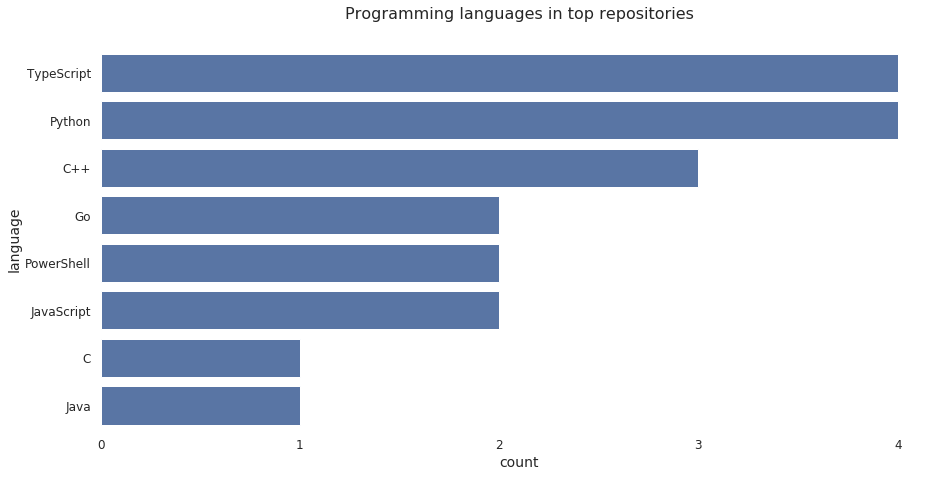

In [20]:
ax = sns.barplot(y = 'language', x = 'count', data=languages_counts, color='b', )
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_frame_on(False)
ax.set(title='Programming languages in top repositories')
plt.show()
# OR: plt.xticks(np.arange(min(languages_counts['count']), max(languages_counts['count'])+1, 1))

In [22]:
repos_df.full_name.unique()

array(['Microsoft/vscode', 'facebook/react-native',
       'tensorflow/tensorflow', 'angular/angular-cli',
       'MicrosoftDocs/azure-docs', 'angular/angular', 'ansible/ansible',
       'kubernetes/kubernetes', 'npm/npm',
       'DefinitelyTyped/DefinitelyTyped', 'pytorch/pytorch',
       'godotengine/godot', 'nuxt/nuxt.js', 'ethereum/go-ethereum',
       'wix/react-native-navigation', 'spyder-ide/spyder',
       'tensorflow/models', 'home-assistant/home-assistant',
       'MarlinFirmware/Marlin'], dtype=object)

In [0]:
top_oss = ['Microsoft/vscode', 'facebook/react-native', 'tensorflow/tensorflow', 
           'angular/angular-cli','MicrosoftDocs/azure-docs', 'angular/angular', 'ansible/ansible',
           'kubernetes/kubernetes', 'npm/npm', 'DefinitelyTyped/DefinitelyTyped']

In [0]:
top_fast =['Microsoft/vscode', 'pytorch/pytorch', 'godotengine/godot', 'nuxt/nuxt.js', 
           'ethereum/go-ethereum', 'wix/react-native-navigation', 'spyder-ide/spyder',
           'tensorflow/models', 'home-assistant/home-assistant', 'MarlinFirmware/Marlin']

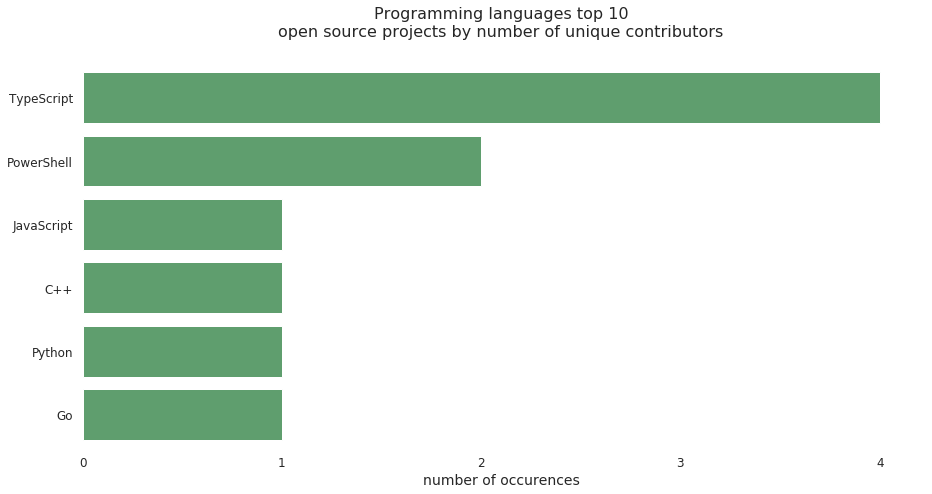

In [51]:
top_oss_lang  = repos_df.query('full_name in @top_oss').drop_duplicates().language.value_counts()
ax = sns.barplot(y=top_oss_lang.index, x=top_oss_lang.values, color='g')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_frame_on(False)
ax.set(title='Programming languages top 10\nopen source projects by number of unique contributors', xlabel='number of occurences')
plt.show()

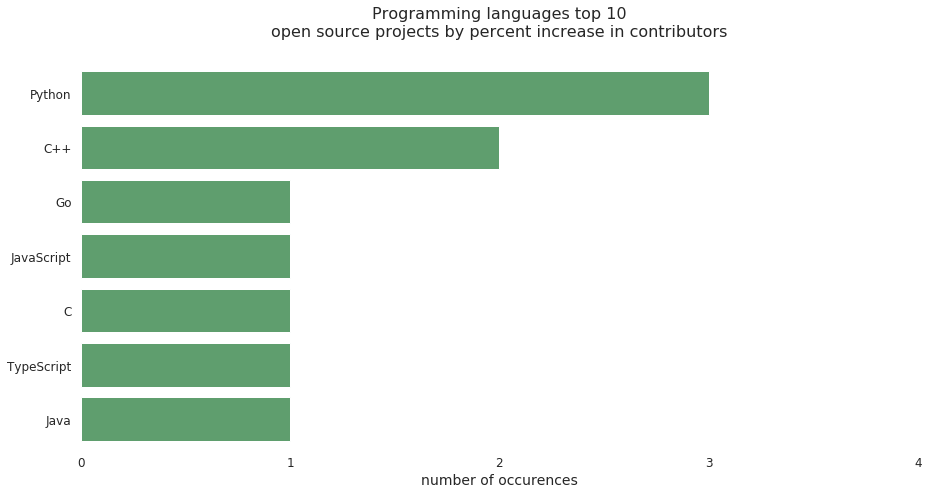

In [60]:
top_fg_lang  = repos_df.query('full_name in @top_fast').drop_duplicates().language.value_counts()
ax = sns.barplot(y=top_fg_lang.index, x=top_fg_lang.values, color='g')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_frame_on(False)
ax.set(title='Programming languages top 10\nopen source projects by percent increase in contributors', xlabel='number of occurences')
plt.xlim(right=4)
plt.show()

### Forks & stars

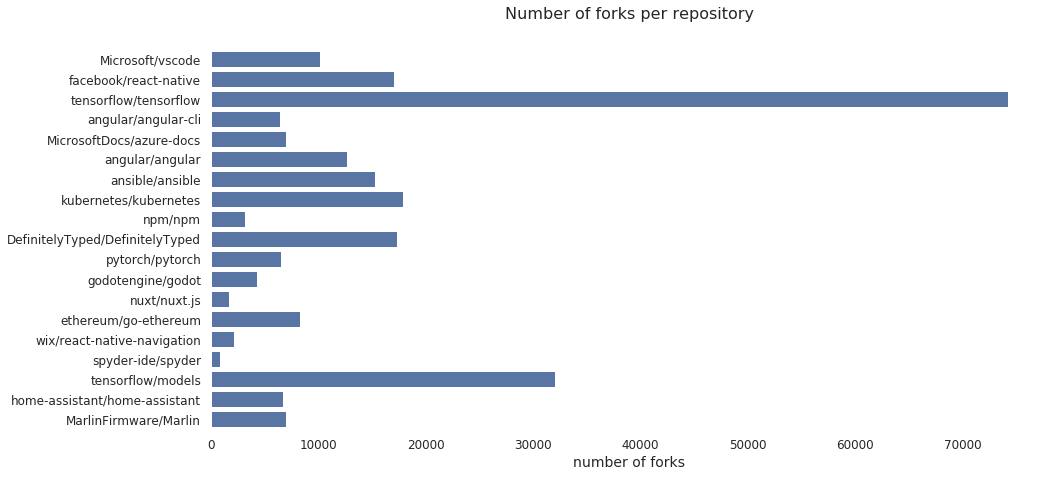

In [81]:
ax = sns.barplot(y=repos_df.full_name, x=repos_df.forks_count, color='b')
ax.set(xlabel='number of forks', ylabel='', title='Number of forks per repository')
ax.set_frame_on(False)
plt.show()

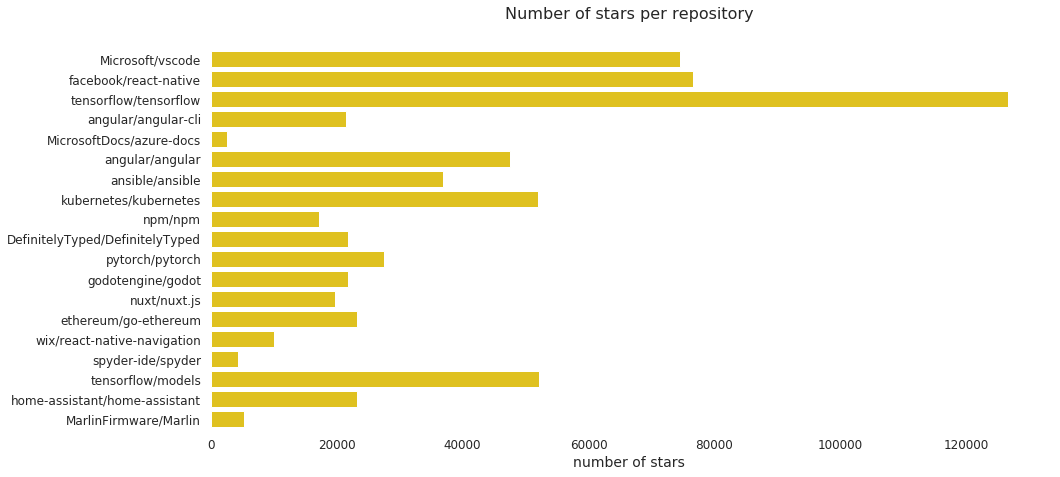

In [75]:
ax = sns.barplot(y=repos_df.full_name, x=repos_df.stargazers_count, color='gold')
ax.set(xlabel='number of stars', ylabel='', title='Number of stars per repository')
ax.set_frame_on(False)
plt.show()

## Issues & PRs

### Issues & Pull Requests (communicative posts)
Data **about comments** for issues and pull requests.  
Date: 25/04/2019 to 30/04/2019

1. **repo_author** - Repository author *(company name)*  
2. **repo_title** - Repository title  
3. **issue_title** - Issue/PR title  
4. **issue_number** - Issue number   
5. **state** - State  
6. **rev_or_ass** - Reviewers/Assignees  
7. **labels** - Labels  
8. **created_at** - Created at  
9. **num_of_participants** - Number of participants  
10. **comment_number** - Issue's comment number *(i.e. 1st, 2nd..;c omment_number==1 --> issue body)*  
11. **reactions** - Reactions  
12. **comment_date** - date of comment  
13. **contributor** - user's status. True/False. 
14. **author** - user's status. True/False. 
15. **member** - user's status. True/False.
16. **collaborator** - user's status. True/False.  
17. **login** - commentator's login  
18. **closed_by** - who closed an issue/PR *(if so)*  
20. **closed_at** - Closed at  
21. **comment_body** - text of comment   



### Fastest growing open source projects
**Description from The State of the Octoverse**: 
*Top 10 open source projects by percent increase in contributors. This list is limited to projects that had more than 1,000 contributors in 2017—and doesn’t include projects used in MOOCs and bootcamps.*
1.	[MicrosoftDocs/azure-docs](https://github.com/MicrosoftDocs/azure-docs)	4.7X
2.	[pytorch/pytorch](https://github.com/pytorch/pytorch)	2.8X
3.	[godotengine/godot](https://github.com/godotengine/godot)	2.2X
4.	[nuxt/nuxt.js](https://github.com/nuxt/nuxt.js)	2.1X
5.	[ethereum/go-ethereum](https://github.com/ethereum/go-ethereum)	2.0X
6.	[wix/react-native-navigation](https://github.com/wix/react-native-navigation)	1.9X
7.	[spyder-ide/spyder](https://github.com/spyder-ide/spyder)	1.8X
8.	[tensorflow/models](https://github.com/tensorflow/models)	1.8X
9.	[home-assistant/home-assistant	](https://github.com/home-assistant/home-assistant)1.6X
10.	[MarlinFirmware/Marlin](https://github.com/MarlinFirmware/Marlin)	1.6X

Read the datasets

In [0]:
msaz = pd.read_csv(PATH_TO_DATA + '/data/MicrosoftDocs_azure-docs_c.csv', index_col = 0)
ptrch = pd.read_csv(PATH_TO_DATA + '/data/pytorch_pytorch_c.csv', index_col = 0)
gdt = pd.read_csv(PATH_TO_DATA + '/data/godotengine_godot_c.csv', index_col = 0)
nxt = pd.read_csv(PATH_TO_DATA + '/data/nuxt_nuxt_js_c.csv', index_col = 0)
eth = pd.read_csv(PATH_TO_DATA + '/data/ethereum_go_ethereum_c.csv', index_col = 0)
reactnn = pd.read_csv(PATH_TO_DATA + '/data/wix_react_native_navigation_c.csv', index_col = 0)
spdr = pd.read_csv(PATH_TO_DATA + '/data/spyder_ide_spyder_c.csv', index_col = 0)
tf_m = pd.read_csv(PATH_TO_DATA + '/data/tf_models_c.csv', index_col = 0)
homeas = pd.read_csv(PATH_TO_DATA + '/data/home_assistant_c.csv', index_col = 0)
marlin =pd.read_csv(PATH_TO_DATA + '/data/marlin_c.csv', index_col = 0)

Merge

In [0]:
top_fg = pd.concat([msaz, ptrch, gdt, nxt, eth, reactnn, spdr, tf_m, homeas, marlin])

In [94]:
top_fg.shape  # much data

(761893, 21)

In [96]:
top_fg.head(3)

,repo_owner,repo_name,issue_title,issue_number,state,rev_ass,labels,created_at,num_participants,comment_number,reactions,comment_date,contributor,author,member,collaborator,login,closed_by,closed_action,closed_at,comment_body
0,MicrosoftDocs,azure-docs,From private repo,1,Merged,No_reviews,None yet,03/11/2016,21,1,n,03/11/2016,True,False,False,False,v-anpasi,NaN,NaN,NaN,NaN
1,MicrosoftDocs,azure-docs,Testing PR Bot - Different Author-MSAuthor,2,Closed,No_reviews,Change sent to author,04/11/2016,3,1,n,04/11/2016,False,False,False,True,jamarw,NaN,NaN,NaN,Testing PR Bot
2,MicrosoftDocs,azure-docs,Testing PR Bot - Different Author-MSAuthor,2,Closed,No_reviews,Change sent to author,04/11/2016,3,2,n,04/11/2016,False,False,False,False,msftclas,NaN,NaN,NaN,Hi @jamarw Im your friendly neighborhood Micro...


In [98]:
top_fg.repo_name.nunique()

10

### Plots

In [0]:
stopwords = set(STOPWORDS)

In [0]:
def show_wordcloud(data, title = None):
  wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3, random_state=1).generate(str(data))
  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
  plt.imshow(wordcloud)
  plt.show()

Looks like comments may contain snippets of code as well  (i.e. words as 'dtype', 'zip') and logins of some users. Perhaps, those who communicate the most.

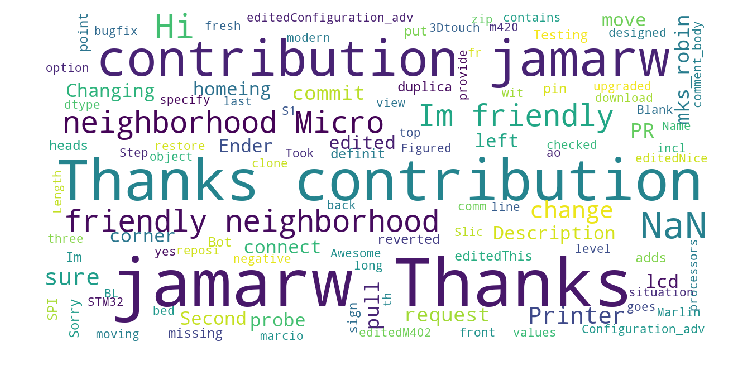

In [102]:
show_wordcloud(top_fg['comment_body'])  # kinda not useful

### Top open source projects
**Description from The State of the Octoverse**: *Top 10 open source projects by number of unique contributors between October 1, 2017 and September 30, 2018.*

1.	[Microsoft/vscode](https://github.com/Microsoft/vscode)	19K
2.	[facebook/react-native](https://github.com/facebook/react-native)	10K
3.	[tensorflow/tensorflow](https://github.com/tensorflow/tensorflow)	9.3K
4.	[angular/angular-cli](https://github.com/angular/angular-cli)	8.8K
5.	[MicrosoftDocs/azure-docs	](https://github.com/MicrosoftDocs/azure-docs)7.8K
6.	[angular/angular](https://github.com/angular/angular)	7.6K
7.	[ansible/ansible](https://github.com/ansible/ansible)	7.5K
8.	[kubernetes/kubernetes](https://github.com/kubernetes/kubernetes)	6.5K
9.	[npm/npm](https://github.com/npm/npm)	6.1K
10.	[DefinitelyTyped/DefinitelyTyped](https://github.com/DefinitelyTyped/DefinitelyTyped)	6.0K


In [0]:
angcli = pd.read_csv(PATH_TO_DATA + '/data/angular_angular_cli_c.csv', index_col = 0)
ang = pd.read_csv(PATH_TO_DATA + '/data/angular_angular_c.csv', index_col = 0)
ansib = pd.read_csv(PATH_TO_DATA + '/data/ansible_ansible_c.csv', index_col = 0)
#msaz = pd.read_csv(PATH_TO_DATA + '/data/MicrosoftDocs_azure-docs.csv', index_col = 0)
kub = pd.read_csv(PATH_TO_DATA + '/data/kubernetes_kubernetes_c.csv', index_col = 0)
npm = pd.read_csv(PATH_TO_DATA + '/data/npm_npm_c.csv', index_col = 0)
deftyp = pd.read_csv(PATH_TO_DATA + '/data/DefinitelyTyped_DefinitelyTyped_c.csv', index_col = 0)
msvs = pd.read_csv(PATH_TO_DATA + '/data/VS_c.csv', index_col = 0)
fbrn = pd.read_csv(PATH_TO_DATA + '/data/facebook_react_native_c.csv', index_col = 0)
tftf = pd.read_csv(PATH_TO_DATA + '/data/tensorflow_tensorflow_c.csv', index_col = 0)

In [0]:
top_cc = pd.concat([msaz, angcli, ang, ansib, kub, npm, deftyp, msvs, fbrn, tftf])

In [107]:
top_cc.shape

(2381800, 21)

In [108]:
top_cc.repo_name.nunique()

10

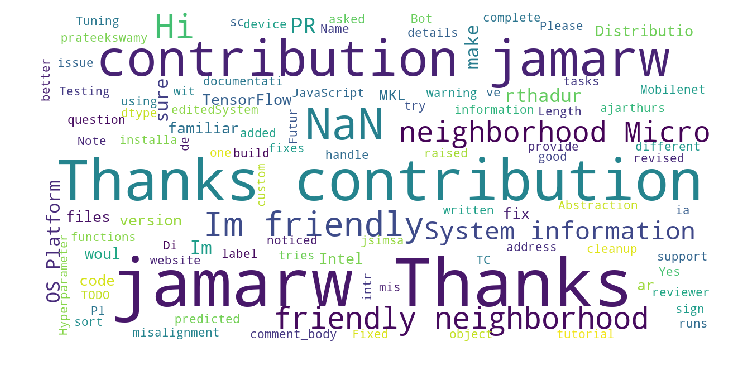

In [109]:
show_wordcloud(top_cc.comment_body)